<div class="alert alert-block alert-info"><h1><b>Data Virtuaization</b></h1></div>

<div class="alert alert-block alert-info"><b>Open cleaned "Test" dataset</b></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter

df_test = pd.read_csv('test_cleaned.csv')
# print(df_test.info())
# df_test

# Change categorical column types from "integer" to "Object"
columns =['InflightWifiservice','DepartureArrivalTimeCconvenient','EaseOfOnlineBooking','GateLocation',
          'FoodAndDrink','OnlineBoarding','SeatComfort','InflightEntertainment','OnBoardService',
          'LegRoomService','BaggageHandling','CheckinService','InflightService','Cleanliness']
for col in columns:
    df_test.loc[:,col] = df_test.loc[:,col].astype('object')
    
# df_test.dtypes

<div class="alert alert-block alert-info"><b>Open cleaned "Train" dataset</b></div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter

df = pd.read_csv('train_cleaned.csv')
# print(df_train.info())
# df_train

# Change categorical column types from "integer" to "Object"
columns =['InflightWifiservice','DepartureArrivalTimeCconvenient','EaseOfOnlineBooking','GateLocation',
          'FoodAndDrink','OnlineBoarding','SeatComfort','InflightEntertainment','OnBoardService',
          'LegRoomService','BaggageHandling','CheckinService','InflightService','Cleanliness']
for col in columns:
    df.loc[:,col] = df.loc[:,col].astype('object')
    
df.dtypes

id                                   int64
Gender                              object
CustomerType                        object
Age                                  int64
TypeOfTravel                        object
Class                               object
FlightDistance                       int64
InflightWifiservice                 object
DepartureArrivalTimeCconvenient     object
EaseOfOnlineBooking                 object
GateLocation                        object
FoodAndDrink                        object
OnlineBoarding                      object
SeatComfort                         object
InflightEntertainment               object
OnBoardService                      object
LegRoomService                      object
BaggageHandling                     object
CheckinService                      object
InflightService                     object
Cleanliness                         object
DepartureDelayInMinutes              int64
ArrivalDelayInMinutes              float64
satisfactio

In [3]:
def pie_chart(title):
    x = df[title].value_counts().tolist()
    labels = df[title].value_counts().index.tolist()

    plt.figure(figsize=(8,6))
    plt.pie(x=x, labels=labels, autopct='%.2f%%', colors=["#EC6B56","#FFC154"])
    plt.title(title, fontsize=14, pad=10, weight="bold")

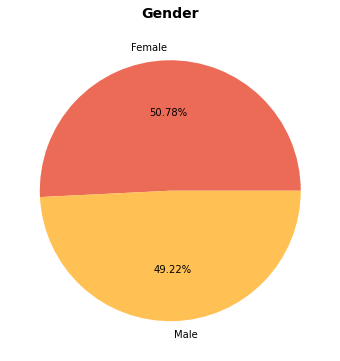

In [4]:
pie_chart("Gender")

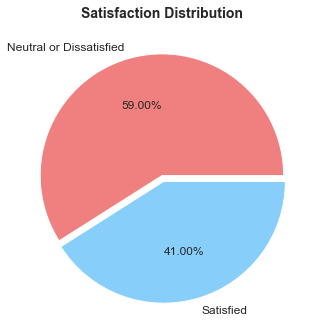

In [70]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(df['satisfaction'].value_counts(), labels=["Neutral or Dissatisfied","Satisfied"], 
        explode=[0, 0.05], autopct='%1.2f%%', 
        colors=["lightcoral","lightskyblue"],
        textprops={'fontsize': 12}, radius=1)
plt.title('Satisfaction Distribution', fontsize=14, pad=10, weight="bold", rotation_mode="anchor", ha="center", va="center")
plt.show()

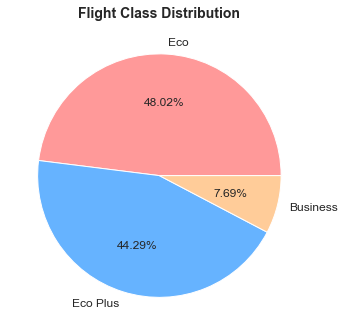

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(df['Class'].value_counts(), labels=["Eco","Eco Plus", "Business"], autopct='%1.2f%%', 
        colors=['#ff9999','#66b3ff','#ffcc99'],
        textprops={'fontsize': 12}, radius=1)
plt.title('Flight Class Distribution', fontsize=14, pad=10, weight="bold", rotation_mode="anchor", ha="center", va="center")
plt.show()

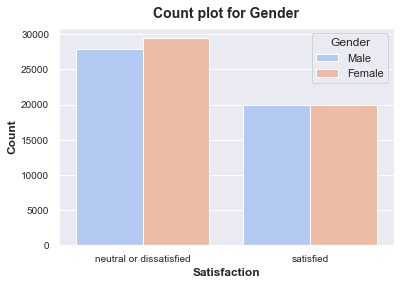

In [72]:
sns.set_theme(style="darkgrid")
sns.countplot(x='satisfaction', hue='Gender', data=df, palette = "coolwarm") # palette="Spectral"
plt.title('Count plot for Gender', fontsize=14, pad=10, weight="bold")
plt.xlabel('Satisfaction', fontsize=12, weight="bold")
plt.ylabel("Count", fontsize=12, weight="bold")
# plt.grid(color ='#95a5a6', linestyle ='-.', linewidth = 2, axis='y', alpha = 0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [153]:
fig2 = px.strip(df, x='FlightDistance', y="Class", orientation="h", color="satisfaction")
# fig2.show()

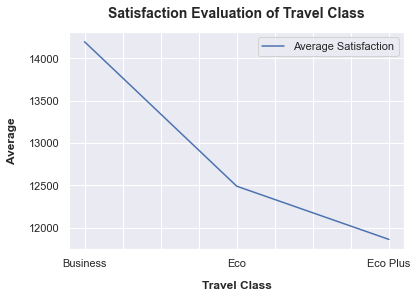

In [155]:
df_mean=df.copy()
df_mean['Average Satisfaction'] = df_mean.mean(numeric_only=True, axis=1)
# df_mean['average'] = df_mean.average
df_mean[['Average Satisfaction','Class']].groupby(['Class']).mean().plot()
plt.title('Satisfaction Evaluation of Travel Class', fontsize=14, pad=14, weight="bold")
plt.xlabel('Travel Class', fontsize=12, labelpad=12, weight="bold")
plt.ylabel("Average", fontsize=12, labelpad=12, weight="bold")
plt.show()

<div class="alert alert-block alert-warning"><b>
EN - Building a plan: </b>

- Eco Plus has the worst rating; 
- people want better service if they pay a little extra for Eco plus.
- More pleople are satifasted.
- I want to create a plan to make it work, I'll only think about how to improve the Eco Plus experience.

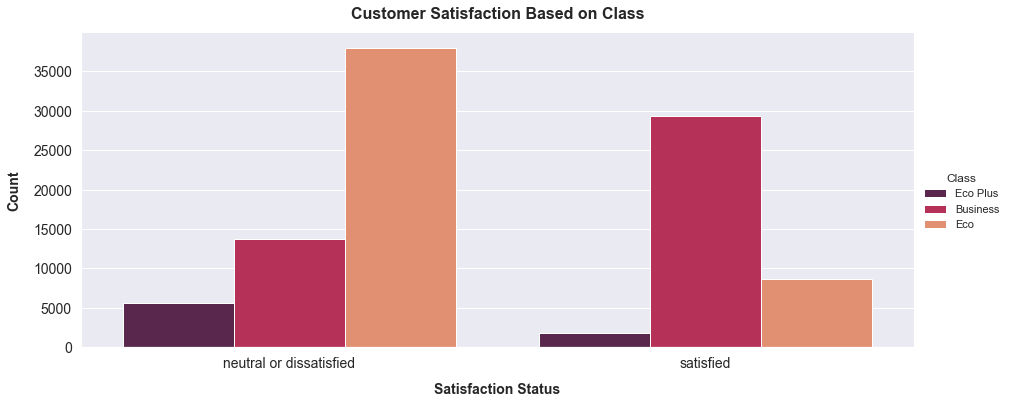

In [76]:
# sns.set_theme(style="darkgrid")
# g = sns.catplot(x="satisfaction", y="FlightDistance", hue="Class", kind="bar", data=df, 
#             height=5, aspect=2.5, ci = None, palette="rocket")
g = sns.catplot(x="satisfaction", hue="Class", kind="count", data=df, 
            height=5, aspect=2.5, ci = None, palette="rocket")
plt.title('Customer Satisfaction Based on Class', fontsize=16, pad=14, weight="bold")
plt.xlabel('Satisfaction Status', fontsize=14, weight="bold", labelpad=12)
plt.ylabel("Count", fontsize=14, weight="bold", labelpad=12)
# plt.grid(color ='#95a5a6', linestyle ='-.', linewidth = 2, axis='y', alpha = 0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

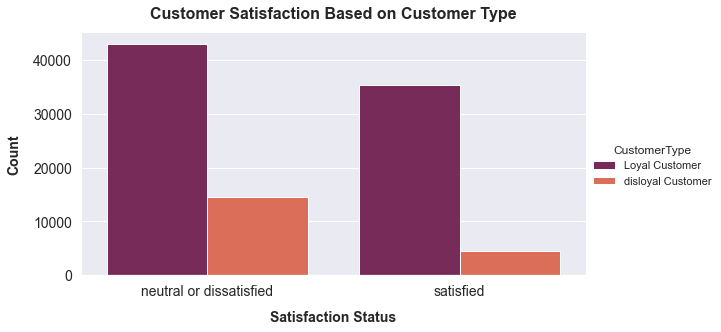

In [81]:
g = sns.catplot(x="satisfaction", hue="CustomerType", kind="count", data=df, 
            height=4, aspect=2, ci = None, palette="rocket")
plt.title('Customer Satisfaction Based on Customer Type', fontsize=16, pad=14, weight="bold")
plt.xlabel('Satisfaction Status', fontsize=14, weight="bold", labelpad=12)
plt.ylabel("Count", fontsize=14, weight="bold", labelpad=12)
# plt.grid(color ='#95a5a6', linestyle ='-.', linewidth = 2, axis='y', alpha = 0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

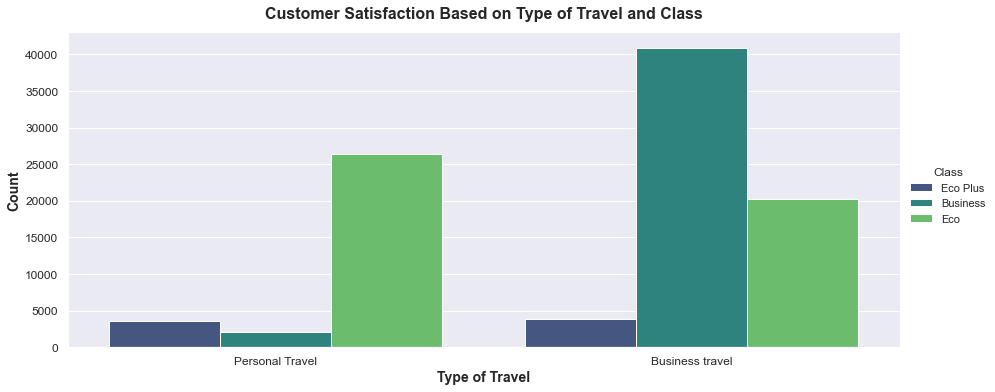

In [74]:
g = sns.catplot(x="TypeOfTravel", hue="Class", data=df, kind="count", height=5, aspect=2.5, palette="viridis");
plt.title('Customer Satisfaction Based on Type of Travel and Class', fontsize=16, pad=14, weight="bold")
plt.xlabel('Type of Travel', fontsize=14, weight="bold")
plt.ylabel("Count", fontsize=14, weight="bold")
# plt.grid(color ='#95a5a6', linestyle ='-.', linewidth = 2, axis='y', alpha = 0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

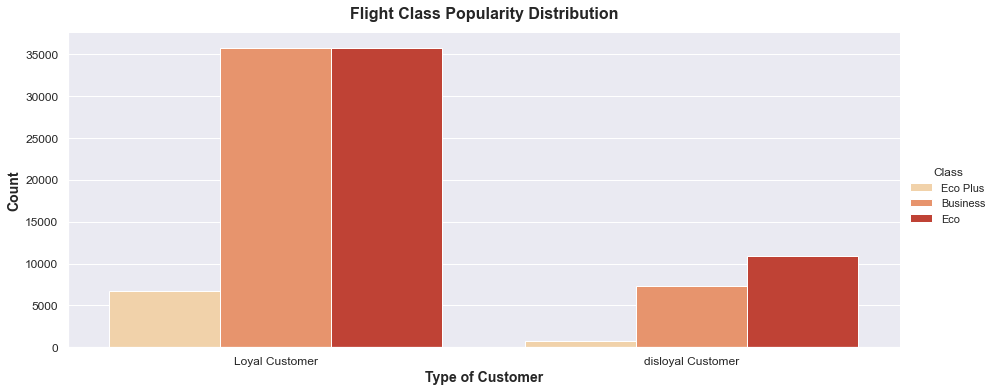

In [160]:
g = sns.catplot(x="CustomerType", hue="Class", data=df, kind="count", height=5, aspect=2.5, palette="OrRd");
plt.title('Flight Class Popularity Distribution', fontsize=16, pad=14, weight="bold")
plt.xlabel('Type of Customer', fontsize=14, weight="bold")
plt.ylabel("Count", fontsize=14, weight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

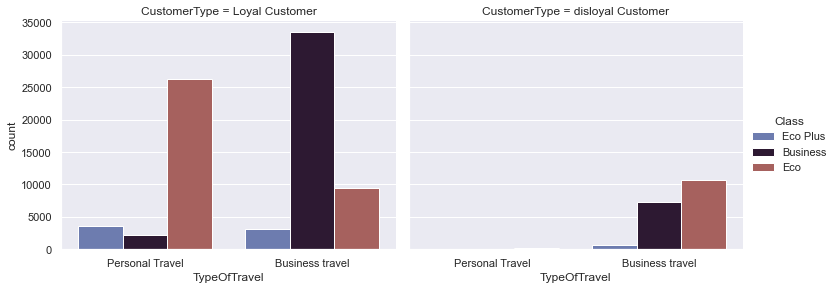

In [137]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="TypeOfTravel", hue="Class", col="CustomerType", data=df, 
                kind="count", height=4, aspect=1.3, palette="twilight");
plt.show()

<div class="alert alert-block alert-danger"><b>Function for Analysis of Satisfaction Level

In [11]:
def satisfactionPlot(column, title, palette):
    cat0 = df[column] == 0
    cat1 = df[column] == 1
    cat2 = df[column] == 2
    cat3 = df[column] == 3
    cat4 = df[column] == 4
    cat5 = df[column] == 5

    sat = df['satisfaction']
    catscore0 = sat[cat0]
    catscore1 = sat[cat1]
    catscore2 = sat[cat2]
    catscore3 = sat[cat3]
    catscore4 = sat[cat4]
    catscore5 = sat[cat5]

    freq0 = catscore0.value_counts()
    freq1 = catscore1.value_counts()
    freq2 = catscore2.value_counts()
    freq3 = catscore3.value_counts()
    freq4 = catscore4.value_counts()
    freq5 = catscore5.value_counts()

    plotdata = pd.DataFrame({0: freq0, 1: freq1, 2: freq2, 3: freq3, 4: freq4, 5: freq5})
    plotdata1 = plotdata.div(plotdata.sum(axis=1), axis =0) * 100

    plotdata1.plot(kind = 'bar', stacked = True, figsize=(10, 6), colormap=palette)
    plt.title(f'"{title}" Satisfaction Level', fontsize=16, pad=14, weight="bold")
    plt.xlabel('Satisfaction Status', fontsize=14, weight="bold", labelpad=16)
    plt.ylabel("Percent", fontsize=14, weight="bold")
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14)
    plt.show()

<div class="alert alert-block alert-info"><b>Analysis of Satisfaction and "Checkin service"

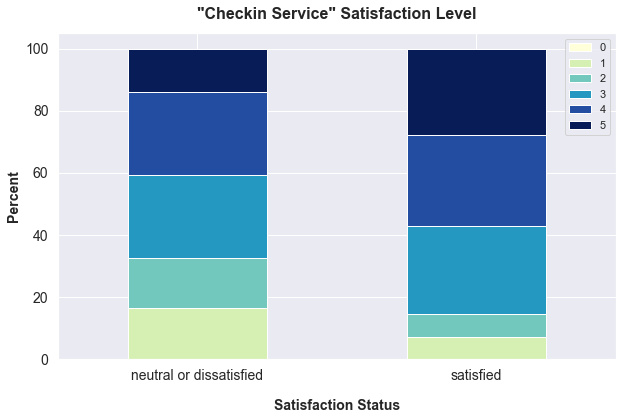

In [12]:
satisfactionPlot("CheckinService", "Checkin Service", "YlGnBu")

<div class="alert alert-block alert-warning">
The percentage of satisfied customers <b>"increases"</b> when the level of check-in services <b>improve</b>.

<div class="alert alert-block alert-info"><b>Analysis of Satisfaction and "Food and Drink"

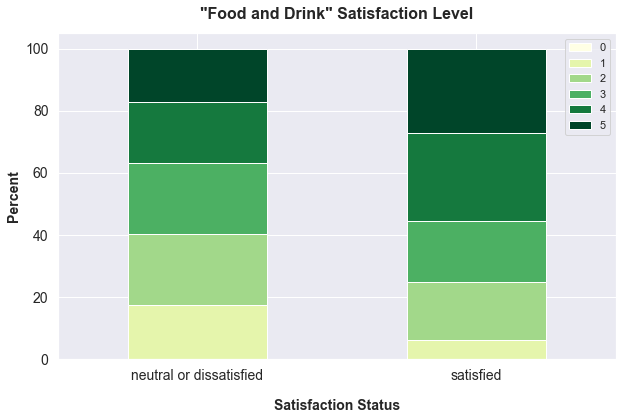

In [13]:
satisfactionPlot("FoodAndDrink", "Food and Drink", "YlGn")

<div class="alert alert-block alert-info"><b>Analysis of Satisfaction and "Seat comfort"

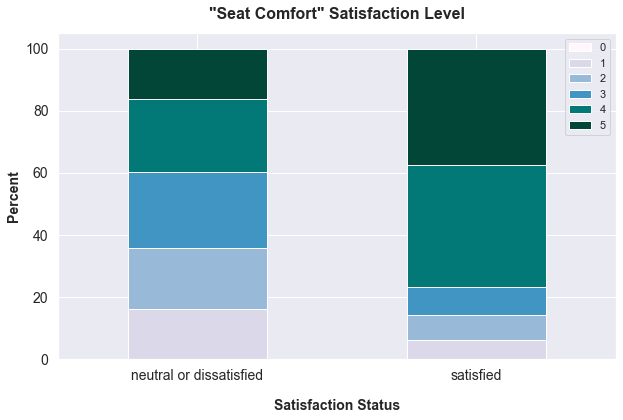

In [175]:
satisfactionPlot("SeatComfort", "Seat Comfort", "PuBuGn")

<div class="alert alert-block alert-info"><b>Analysis of Satisfaction and "On-board service"

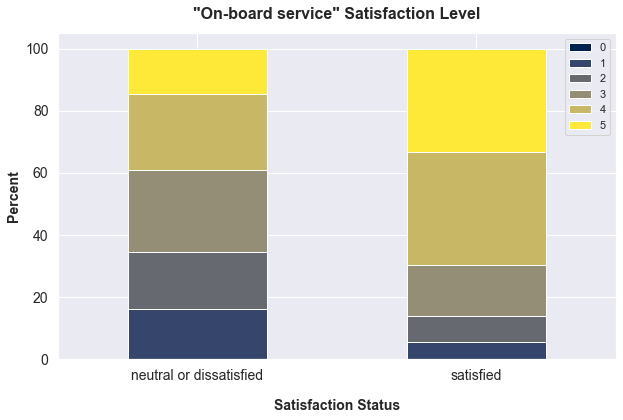

In [183]:
satisfactionPlot("OnBoardService", "On-board service", "cividis")

<div class="alert alert-block alert-info"><b>Analysis of Satisfaction and "Type of Travel"

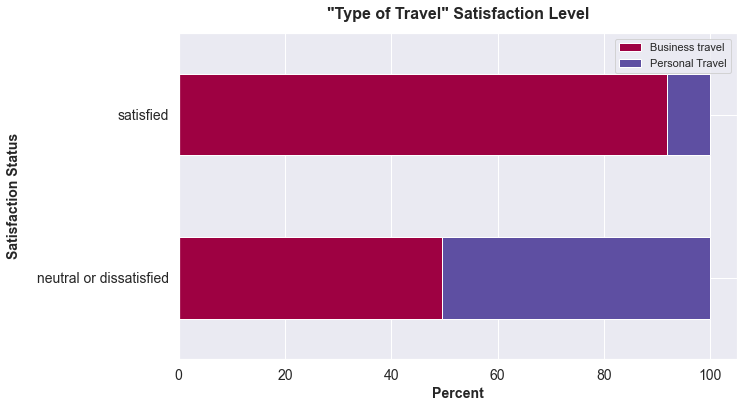

In [184]:
cat1 = df['TypeOfTravel'] == 'Business travel'  
cat2 = df['TypeOfTravel'] == 'Personal Travel'

sat = df['satisfaction']
catscore1 = sat[cat1]
catscore2 = sat[cat2]

freq1 = catscore1.value_counts()
freq2 = catscore2.value_counts()

plotdata = pd.DataFrame({'Business travel': freq1, 'Personal Travel': freq2})
plotdata1 = plotdata.div(plotdata.sum(axis=1), axis =0) * 100

plotdata1.plot(kind = 'barh', stacked = True, figsize=(10, 6), colormap='Spectral')
plt.title('"Type of Travel" Satisfaction Level', fontsize=16, pad=14, weight="bold")
plt.ylabel('Satisfaction Status', fontsize=14, weight="bold", labelpad=16)
plt.xlabel("Percent", fontsize=14, weight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<div class="alert alert-block alert-info"><b>Analysis of Flight Class based on "Flight Distance"

In [96]:
df_train = df.copy()
categories = list(df_train.select_dtypes(exclude=['int64', 'float64']).columns)
# categories

column_dicts = {}

def categorize(df, cat):
    cats = df[cat].astype('category').cat.codes
    if (cat not in column_dicts):
        col_dict = dict(zip(cats, df[cat]))
        col_dict = {k: col_dict[k] for k in sorted(col_dict)} # Because it doesn't sort by default, that was fun
        column_dicts[cat] = col_dict
    df[cat] = cats

def categorizeAll(df):
    for cat in categories:
        categorize(df, cat)


categorizeAll(df_train)
# df_train.head()
# column_dicts

class_dict = column_dicts['Class']
def short_score(value):
    return '{0:.3f}'.format(value)

def hist_avg(column):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.histplot(x=column, hue='Class', data=df_train, kde=True, palette='viridis')
    ax.set_xlabel("Flight Distance", fontsize=14, weight="bold", labelpad=14)
    ax.set_ylabel("Count", fontsize=14, weight="bold")
    average = np.average(df_train[column])
    plt.axvline(average, color='red')
    plt.title('Flight Class Preference Based on Flight Distance', fontsize=16, pad=14, weight="bold")
    plt.legend(labels=[*list(reversed(list(class_dict.values()))), f'Average ({short_score(average)})'], 
               loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

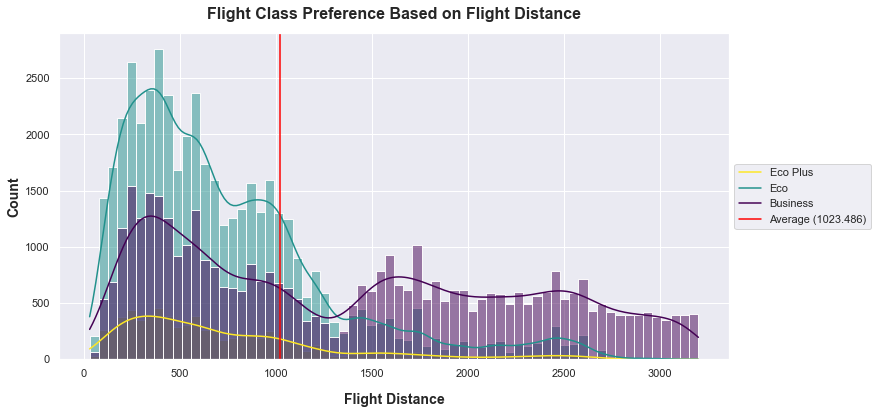

In [97]:
hist_avg('FlightDistance')

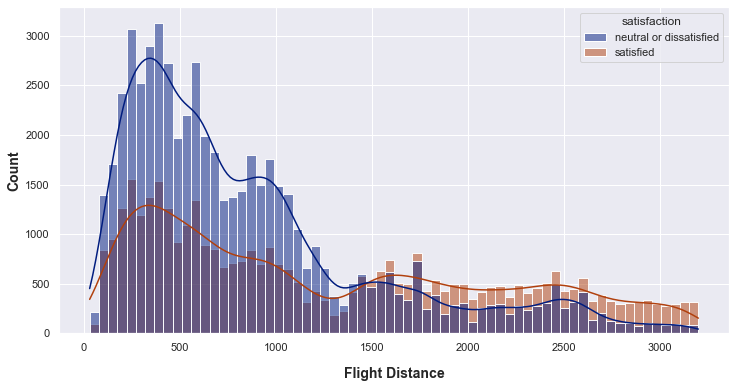

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(x='FlightDistance', hue="satisfaction", data=df, kde=True, palette="dark")
ax.set_xlabel("Flight Distance", fontsize=14, weight="bold", labelpad=14)
ax.set_ylabel("Count", fontsize=14, weight="bold")
plt.show()

In [362]:
# categorics=['Gender', 'CustomerType','TypeOfTravel', 'Class','InflightWifiservice',
#        'DepartureArrivalTimeCconvenient', 'EaseOfOnlineBooking',
#        'GateLocation', 'FoodAndDrink', 'OnlineBoarding', 'SeatComfort',
#        'InflightEntertainment', 'OnBoardService', 'LegRoomService',
#        'BaggageHandling', 'CheckinService', 'InflightService',
#        'Cleanliness']

# for i in categorics:
#   plt.figure(figsize=(16,6))
#   plt.subplot(1,2,1)
#   sns.countplot(x=df[i], palette="Pastel1")

#   plt.subplot(1,2,2)
#   sns.countplot(x=df[i], hue=df.satisfaction, palette=["#f08080","#87cefa"])
#   plt.show()

In [17]:
def percentage(x):
  return round(100*x.count()/df.shape[0],2)

total = float(len(df))

In [18]:
df.pivot_table(index=["CustomerType","Class"], columns=["satisfaction"], aggfunc={"satisfaction":["count", percentage]})

satisfaction            \
                                             count             
satisfaction               neutral or dissatisfied satisfied   
CustomerType      Class                                        
Loyal Customer    Business                    9291     26435   
                  Eco                        28622      7168   
                  Eco Plus                    4983      1785   
disloyal Customer Business                    4438      2904   
                  Eco                         9380      1527   
                  Eco Plus                     658        56   

                                                              
                                        percentage            
satisfaction               neutral or dissatisfied satisfied  
CustomerType      Class                                       
Loyal Customer    Business                    9.55     27.18  
                  Eco                        29.43      7.37  
                  Eco Plus                    5.12      1.84  
disloyal Customer Business                    4.56      2.99  
                  Eco                         9.65      1.57  
                  Eco Plus                    0.68      0.06

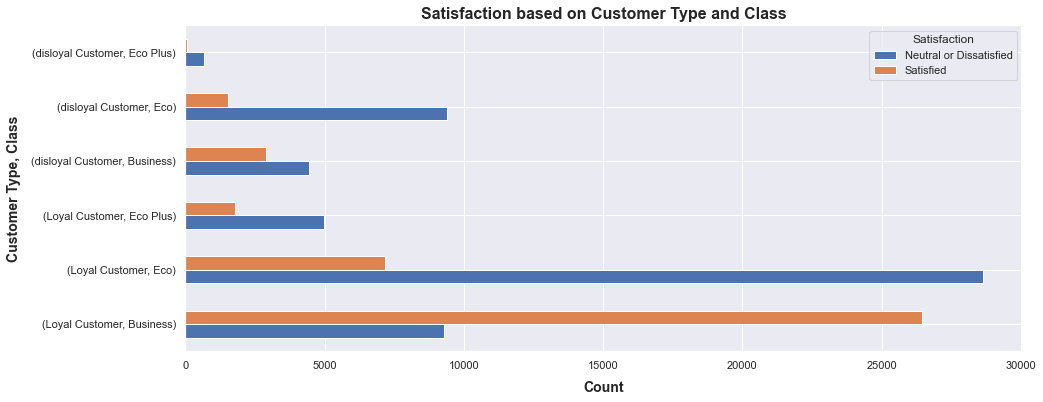

In [173]:
ax = df.pivot_table(index=["CustomerType", "Class"], columns=["satisfaction"], aggfunc={"satisfaction":"count"}).plot(kind="barh", figsize=(15,6))
plt.title('Satisfaction based on Customer Type and Class', fontsize=16, weight="bold")
plt.xlabel("Count", fontsize=14, weight="bold", labelpad=10)
plt.ylabel("Customer Type, Class", fontsize=14, weight="bold", labelpad=10)
plt.legend(title='Satisfaction', loc='upper right', labels=['Neutral or Dissatisfied', 'Satisfied'])
plt.show()

# bars = ('Disloyal, Eco Plus', 'Disloyal, Eco', 'Disloyal, Business', 'Loyal, Eco Plus', 'Loyal, Eco', 'Loyal, Business')
# y_pos = np.arange(len(bars))
# plt.bar(y_pos)
# plt.xticks(y_pos, bars)

# for p in ax.patches:
#     percentage = '{:.1f}%'.format(100 * p.get_width()/total)
#     x,y  = p.get_x() + p.get_width() + 1000, p.get_y()
#     ax.annotate(percentage, (x, y), ha='right')


<div class="alert alert-block alert-warning">We can see that those who are <b>loyal customers</b> and in the <b>business class</b> are the passengers with the <b>highest satisfaction rate (27.2%)</b>. Passengers who are <b>loyal</b> and in the <b>eco class</b> are the passengers with the <b>highest dissatisfaction rate (29.4%)</b>.

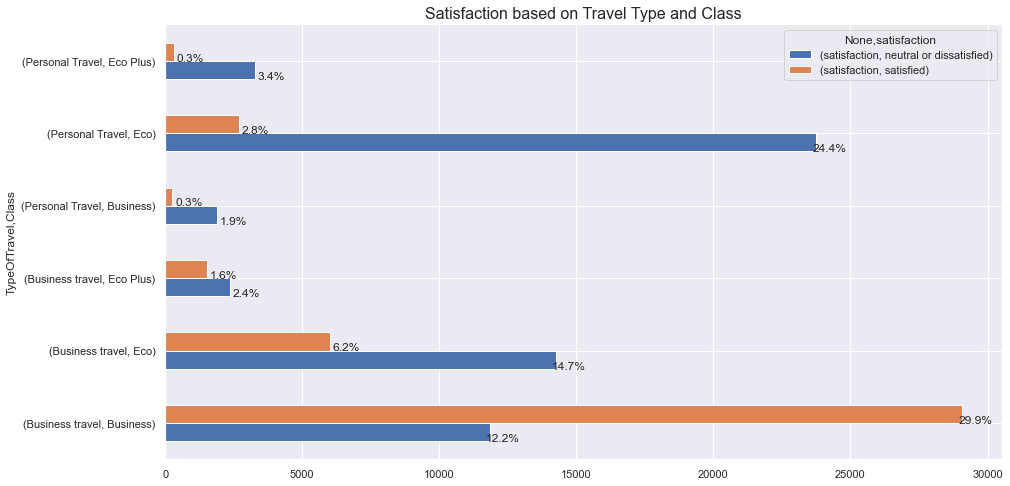

In [20]:
ax = df.pivot_table(index=["TypeOfTravel","Class"],columns=["satisfaction"], 
                    aggfunc={"satisfaction":"count"}).plot(kind="barh", figsize=(15,8))
plt.title('Satisfaction based on Travel Type and Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1100, p.get_y()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

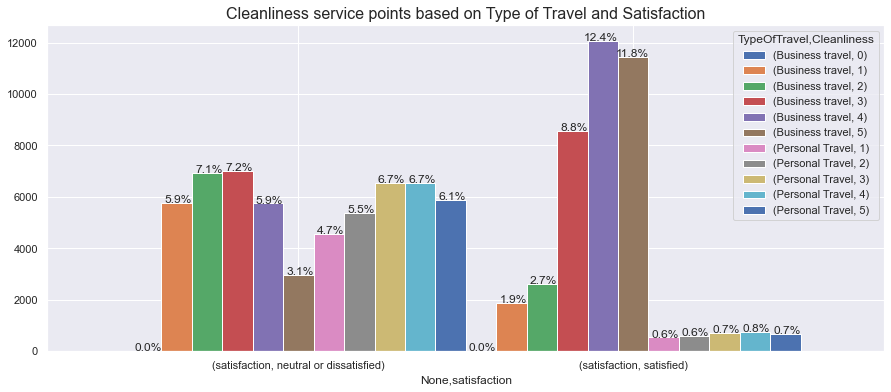

In [21]:
ax = df.pivot_table(index=["TypeOfTravel","Cleanliness"],columns=["satisfaction"],
                    aggfunc={"satisfaction":"count"}, fill_value=0).T.plot(kind="bar", figsize=(15,6), rot=0, width=1)
plt.title('Cleanliness service points based on Type of Travel and Satisfaction', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

In [175]:
cols = ['Gender', 'CustomerType','TypeOfTravel', 'Class', 'InflightWifiservice','DepartureArrivalTimeCconvenient', 
        'EaseOfOnlineBooking', 'GateLocation', 'FoodAndDrink', 'OnlineBoarding', 'SeatComfort', 'InflightEntertainment', 
        'OnBoardService', 'LegRoomService', 'BaggageHandling', 'CheckinService', 'InflightService','Cleanliness']

y_labels = ['Gender', 'Customer Type','Type Of Travel', 'Class', 'Inflight Wifi Service','Departure Arrival TimeCconvenient', 
        'Ease Of Online Booking', 'Gate Location', 'Food And Drink', 'Online Boarding', 'Seat Comfort', 'Inflight Entertainment', 
        'OnBoard Service', 'Leg Room Service', 'Baggage Handling', 'Checkin Service', 'Inflight Service','Cleanliness']

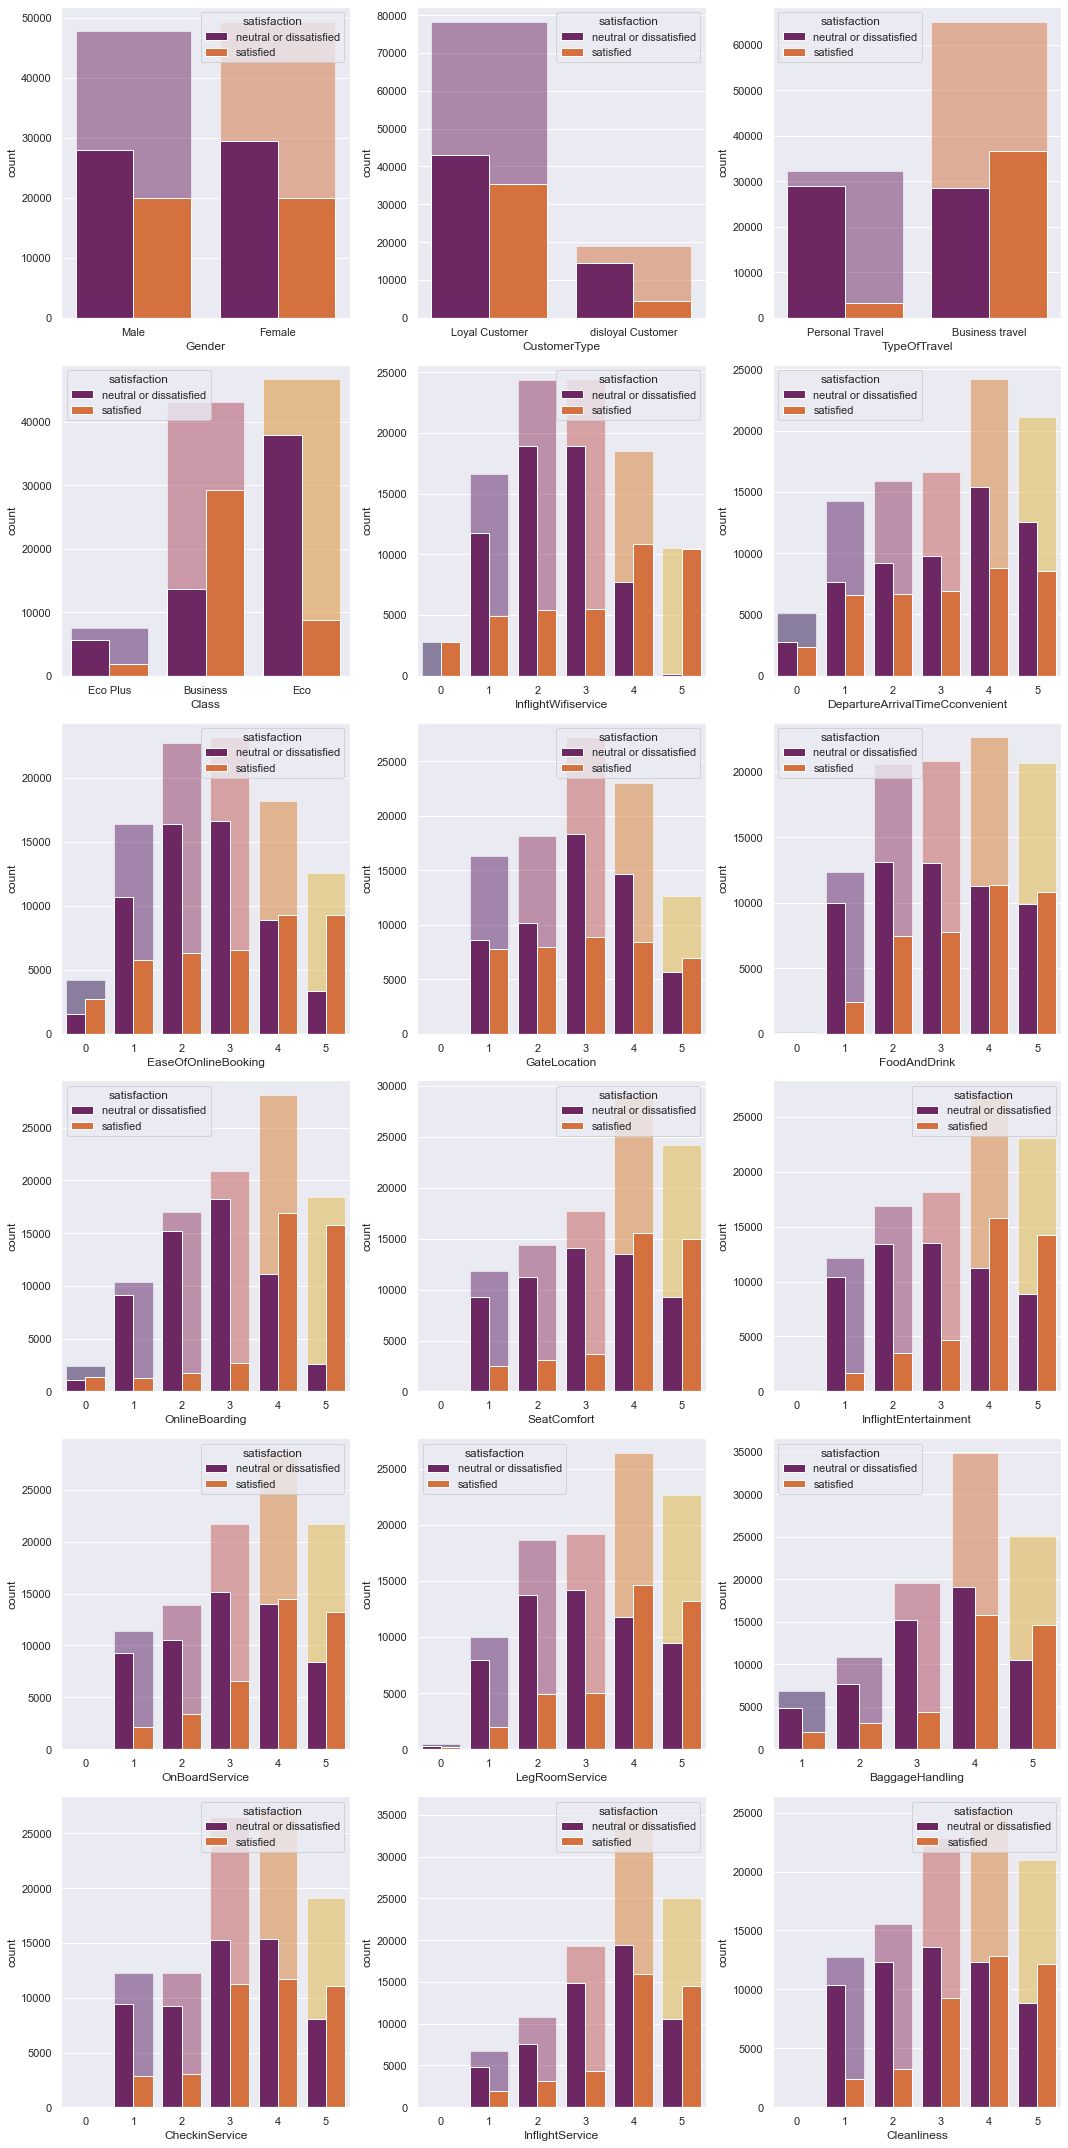

In [178]:
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
for variable, subplot in zip(cols, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot, alpha=0.5, palette='inferno')
    sns.countplot(x=df[variable], hue=df['satisfaction'], ax=subplot, palette='inferno')
#     plt.xlabel(f"{y_labels}", fontsize=14, weight="bold", labelpad=10)
    
#     for label in subplot.get_xticklabels():
#         label.set_rotation(15)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">

- satisfaction increases with age. Most dissatisfied passengers ~ 25 years old, most satisfied ~ 45 years old
- satisfaction increases with distance, and the shorter the distance, the greater the dissatisfaction
- an increase in the quality of the additional services provided increases satisfaction.

greatly reduces satisfaction:

- low quality wi-fi
- lack of cleanliness
- low quality or lack of ease of online booking
- poor quality food or drinks or lack of them
- low seating comfort

greatly increases satisfaction:

- quality of food and drinks
- online boarding
- quality entertainment on board (video, music, etc.)
- high quality service on board
- quality luggage service


<div class="alert alert-block alert-warning"> 
    
- inflight wifi service most of the data are in 2 and 3 point and end up a lot dissatisfied, it happens also in ease of online booking, gate location . departure/arrival time are in good trends but not lead to the satisfaction of the airline. Food and drink seems neutral and not impresive . Online boarding, seat comfort, inflight entertaintment, on-board-service, leg room service, cleanliness are in the good shape with the most of the data in point 4 and the trends lead to the satisfaction of the airline. Baggage handling, checkin service and inflight service are slightly like departure/arrival time but still got a lot satisfaction in point 5.
***
- so in summary inflight wifi service, online booking and gate location need big improvement for better overall service performance.
***  
- Food and drink, baggage handling, checkin service and inflight service just need little improvement cause they already have the good trends.
***    
- And big question mark for the departure/arrival time convenient, why they have good trends but end up in dissatisfaction.
***    
- For the gender and customer type, the data shows that they are less important for the overall satisfaction. The passenger of business class and type shows that they are tend to be satisfied. and the eco class shows the worst percentage of the passenger to not to be satisfied with the airline.   
***
- The Airlines passenger satisfaction are dominanth by the older people within range of the age between 40 - 60 for the business travel using business class wihtin long flying range distance, which supported and reinforced by good services score for older people like seat comfort, on-board service and leg room.
***
- Age < 40 and age > 60 tend to not satisfied, while age range for 40 - 60 tend to be satisifed with the airlines. In short range flight distance the passenger tend to be not satisfied while at the more long range tend to be satisfied. In arrival and departure delay, the shorter delay tend to be satisfied the passenge.

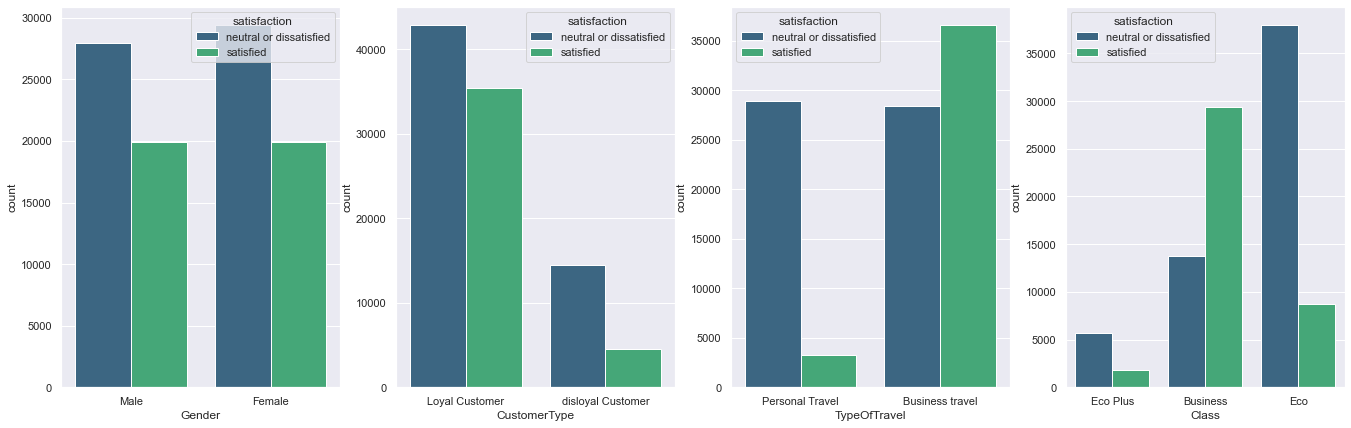

In [25]:
col2 =['Gender','CustomerType','TypeOfTravel','Class']

fig, ax = plt.subplots(1,4, figsize=(23, 7))
for variable, subplot in zip(col2, ax.flatten()):
    sns.countplot(x=df[variable], hue=df['satisfaction'], ax=subplot, palette='viridis')

<div class="alert alert-block alert-warning"> 
We found that the most important features were:

- Cleanliness
- Food and drink
- Inflight entertainment
- Online boarding
- Inflight wifi service
- Type of Travel - Personal Travel

<div class="alert alert-block alert-warning"> 
Gender for the age are completely the same, less important. the passenger with age > 40 tend to be loyal and satisfied with the airline, while passenger with the younger age tend to be disloyal but satisfied with the airline. again the passenger with age over 40 dominance the business travel type of travel and tend to be satisfied with the airline. eco plus and eco dominance by the younger passenger, < 20, with tend to be not satisfied, while bussiness class are dominance by the older passenger, with age over 40 years and tend to be satisfied with the airline.

<div class="alert alert-block alert-warning"> 
Business class are dominant by the business type of travel with long range filght distance

<div class="alert alert-block alert-warning"> 
The Airlines passenger satisfaction are dominanth by the older people within range of the age between 40 - 60 for the business travel using business class wihtin long flying range distance, which supported and reinforced by good services score for older people like seat comfort, on-board service and leg room.

In [26]:
cat_data_cols = ['Gender', 'CustomerType', 'TypeOfTravel', 'Class', 'InflightWifiservice',
       'DepartureArrivalTimeCconvenient', 'EaseOfOnlineBooking',
       'GateLocation', 'FoodAndDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'OnBoardService', 'LegRoomService',
       'BaggageHandling', 'CheckinService', 'InflightService',
       'Cleanliness', 'satisfaction']

cont_data_cols = ['Age', 'FlightDistance', 'DepartureDelayInMinutes', 'ArrivalDelayInMinutes']

In [27]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs

def satisfaction_by_feature(feature):
    if feature in cat_data_cols:
        grp_by_feature = df.groupby(by = [feature, 'satisfaction'])['id'].count().reset_index()
        grp_by_total = df.groupby(by = [feature])['id'].count().reset_index()
        grp_by = pd.merge(left = grp_by_feature, right = grp_by_total, on = feature, how = 'inner')
        grp_by['% Satisfied\Dissatisfied'] = round(grp_by['id_x']/grp_by['id_y'] * 100, 2)
        grp_by.drop(columns = ['id_x', 'id_y'], inplace = True)
    else:
        return 'Enter a valid Categorical feature from the data set'
        exit()
        
    data = [go.Bar(x = grp_by[grp_by['satisfaction'] == 'satisfied'][feature], 
                   y = grp_by[grp_by['satisfaction'] == 'satisfied']['% Satisfied\Dissatisfied'], 
                   name = 'Satisfied', 
                   text = grp_by[grp_by['satisfaction'] == 'satisfied']['% Satisfied\Dissatisfied'], 
                   textposition = 'inside', 
                   textfont = {'color': 'white'}, 
                   marker = dict(line = {'color': 'black', 'width': 1.5})), 
       
            go.Bar(x = grp_by[grp_by['satisfaction'] == 'neutral or dissatisfied'][feature], 
                   y = grp_by[grp_by['satisfaction'] == 'neutral or dissatisfied']['% Satisfied\Dissatisfied'], 
                   name = 'Dissatisfied', 
                   text = grp_by[grp_by['satisfaction'] == 'neutral or dissatisfied']['% Satisfied\Dissatisfied'], 
                   textposition = 'inside', 
                   textfont = {'color': 'white'}, 
                   marker = dict(line = {'color': 'black', 'width': 1.5}))]

    layout = go.Layout(title = dict(text = 'Satisfaction Rate By : ' + feature, font = {'size': 20}, x = 0.5, y = 0.88),
                       xaxis = dict(title = feature, titlefont = {'size': 16}),
                       yaxis = dict(title = 'Satisfaction Rate', titlefont = {'size': 16}),
                       barmode = 'stack', hovermode = 'closest', height = 500, width = 650)

    fig = go.Figure(data = data, layout = layout)
    fig.show()
    
    return iplot(fig)

In [387]:
# for col in cat_data_cols:
#     satisfaction_by_feature(col)

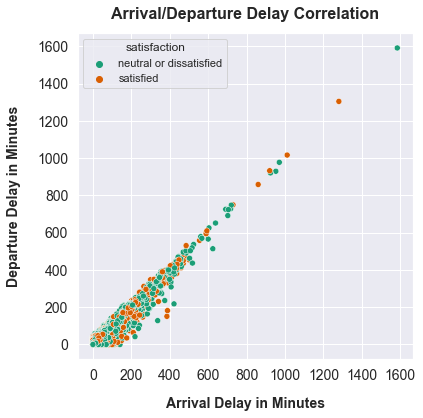

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x="ArrivalDelayInMinutes", y="DepartureDelayInMinutes", hue='satisfaction', palette="Dark2")
plt.title("Arrival/Departure Delay Correlation", fontsize=16, pad=14, weight="bold")
plt.ylabel('Departure Delay in Minutes', fontsize=14, weight="bold", labelpad=16)
plt.xlabel("Arrival Delay in Minutes", fontsize=14, weight="bold", labelpad=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

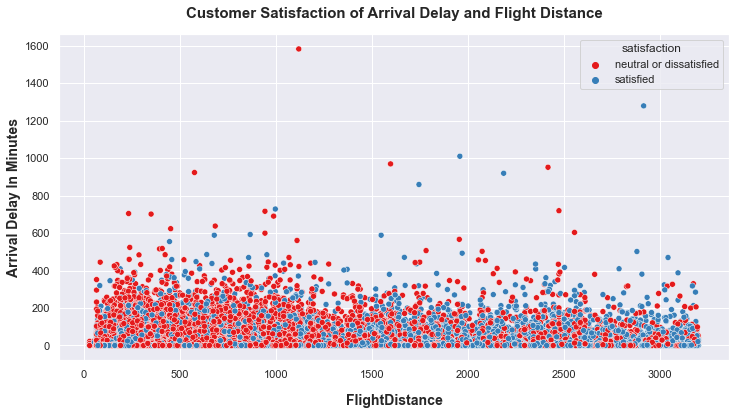

In [29]:
plt.figure(figsize=(12,6))

sns.scatterplot(y ='ArrivalDelayInMinutes',x = 'FlightDistance', data = df, hue = 'satisfaction', palette="Set1")
plt.title('Customer Satisfaction of Arrival Delay and Flight Distance', fontsize=15, pad=16, weight="bold")
plt.xlabel('FlightDistance', fontsize=14, labelpad=14, weight="bold")
plt.ylabel("Arrival Delay In Minutes", fontsize=14, weight="bold")
plt.show()

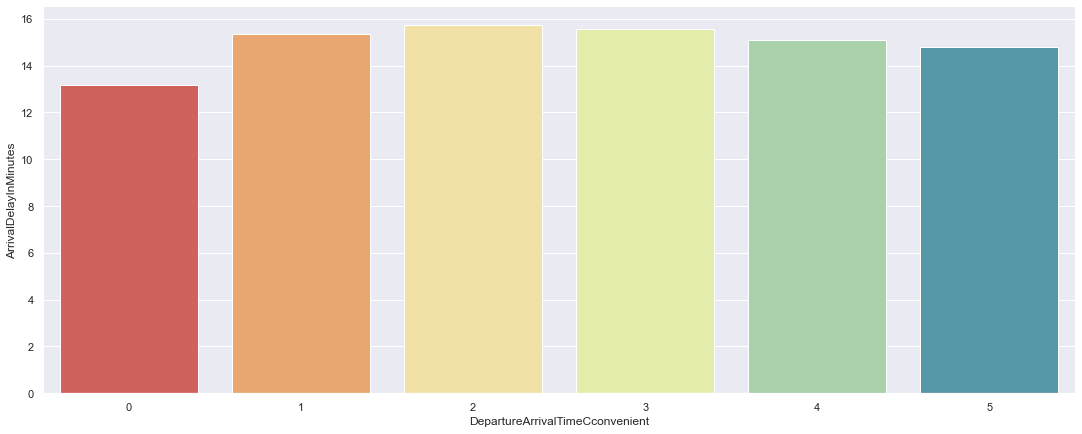

In [115]:
ax = sns.catplot(x="DepartureArrivalTimeCconvenient", y="ArrivalDelayInMinutes", kind="bar", data=df, height=6, aspect=2.5, ci = None, palette="Spectral")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



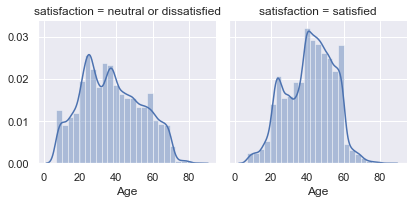

In [410]:
g= sns.FacetGrid(df, col="satisfaction")
g.map(sns.distplot,"Age", bins=25)
plt.show()

<div class="alert alert-block alert-warning"> 
    
- 0-20 years old is generally neutral or dissatisfied with the flight.
- 30-60 years old is generally satisfied with the flight.
- 65-80 years old passengers is neutral or dissatisfied.

<div class="alert alert-block alert-warning"> 

- Satisfaction is not strongly influenced by gender, although women are slightly more dissatisfied than men.
- There are more women in the data than men.
- There are more loyal passengers in the data than ordinary ones.
- Disloyal passengers are most often dissatisfied with the flight.
- Passengers who fly for business are much more likely to be satisfied than those who fly privately. Passengers on private flights are almost always dissatisfied.
- Passengers who fly for business are much more likely to be satisfied than those who fly privately. Passengers on private flights are almost always dissatisfied.

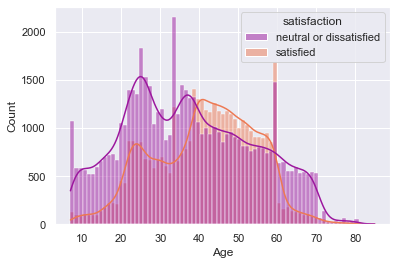

In [121]:
sns.histplot(x='Age', hue="satisfaction", data=df, kde=True, palette="plasma")
plt.show()

In [ ]:
# Focus on interesting features
focus_features = ['Age', 'FlightDistance', 'InflightWifiservice', 'OnlineBoarding', 'SeatComfort', 'InflightEntertainment']


sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(focus_features):
    sns.displot(data=df, x=feature, kind='kde', hue='satisfaction')  
    
sns.despine()